# KNN and Naive Bayes

K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm where the classification of an observation is determined by the majority vote of its neighbours. In this exercise, we will explore the sensitivity of the KNN model to the choice of the number of neighbors (K) and the type of distance metric used.

## Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

## Load and prepare dataset

The dataset used in this notebook is the `Breast Cancer` dataset provided by `scikit-learn`. This dataset comprises features crucial for distinguishing between malignant (cancerous) and benign (non-cancerous) tumors.

This notebook aims to apply KNN models to this data to accurately classify malignant and benign tumors based on cell characteristics to aid in early diagnosis, guide treatment decisions, and potentially improve patient outcomes.

In [2]:
# Load the dataset
X, y = load_breast_cancer(return_X_y=True)

We then split the data to prepare the training and testing datasets.

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 1

We experiment with different values of K to understand how it affects the accuracy and generalisation of the model.

We Use a for loop to train different K-nearest neighbours models, each with a different number of neighbours as follows: `1, 3, 5, 7, 9`.
Evaluate each model's performance on the test set and print its accuracy score.

In [10]:
k_range = [1, 3, 5, 7, 9]

scores = []

for i in k_range:
    nb = KNeighborsClassifier(n_neighbors=i)
    nb.fit(X_train, y_train)
    y_hat = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_hat)
    scores.append(accuracy)
    print(f'The accuracy score for k={i} is : {accuracy}')

The accuracy score for k=1 is : 0.9298245614035088
The accuracy score for k=3 is : 0.9298245614035088
The accuracy score for k=5 is : 0.956140350877193
The accuracy score for k=7 is : 0.956140350877193
The accuracy score for k=9 is : 0.956140350877193


In the for loop, a new instance of `KNeighborsClassifier` is created with the current `k` from the list. This classifier will consider 
`k` nearest neighbours to make predictions. The accuracy score for each `k` is then appended to the `scores` list and later printed for comparison.

Typically, a smaller K results in a model that captures more noise and details of the training data, potentially leading to overfitting. On the other hand, a larger K tends to smooth out the decision boundaries, which can improve generalisation but may also lead to underfitting if K is too large. 

From the results for our different k values, we see that the accuracy stops increasing past `k=5`. This suggests that `k=5` could be the optimal choice for good accuracy while minimising the risk of overfitting or underfitting.

### Step 2

We also compare the impact that different distance metrics will have on the accuracy of the KNN model.

Again, we use a for loop to train different K-nearest neighbours models, each with a different distance metric as follows: `euclidean, manhattan, chebyshev`. Evaluate each model's performance on the test set and print its accuracy score.

In [13]:
metrics = ['euclidean', 'manhattan', 'chebyshev']

for i in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=i)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    print(f'The accuracy for {i} distance is: {accuracy_score(y_test, y_hat)}')

The accuracy for euclidean distance is: 0.956140350877193
The accuracy for manhattan distance is: 0.9473684210526315
The accuracy for chebyshev distance is: 0.956140350877193


The loop iterates over each metric specified in the `metrics` list. For each metric, a new instance of `KNeighborsClassifier` is created with `5` neighbours and the specified metric. The accuracy for each metric is then printed out.

We observe that, although the differences may be subtle, the choice of distance metric can influence the accuracy of a KNN model depending on the dataset and the features' characteristics. 

From our results, it seems that the `Euclidean` and `Chebyshev` distances are equally effective for this particular dataset while `Manhattan` performs slightly differently which could be due to the nature of the dataset such as scale and distribution of features.

### Step 3

**a)** 

We want to be able to train a KNN model using a given K and a distance metric. We will then plot the decision boundary to better understand how the model classifies different regions of the feature space based on the chosen K and metric.

The function below contains the code for visualising the decision boundary. 

For simplicity during plotting, we train the model using only two features.

In [21]:
 def plot_decision_boundary(X, y, k, metric):
    # Add your code here
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X[:, :2], y)

    # Create a mesh grid based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict class for each point on the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contours
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')  # Plot the training points
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"Decision Boundary for K={k} with {metric} metric")
    plt.show()

We add the following parameters to the function: 
- `X`: The feature dataset.
- `y`: The target dataset.
- `k`: The number of neighbors to use for the KNN classifier.
- `metric`: The distance metric to use in the KNN classifier.

We then add code to set up the KNN classifier with the specified number of neighbours and distance metric and train it using only the first two features of the dataset. 

**b)** 

We use the function created in **section a** to plot the decision boundary of a KNN model trained using `5` nearest neighbours and the `euclidean` distance metric. 

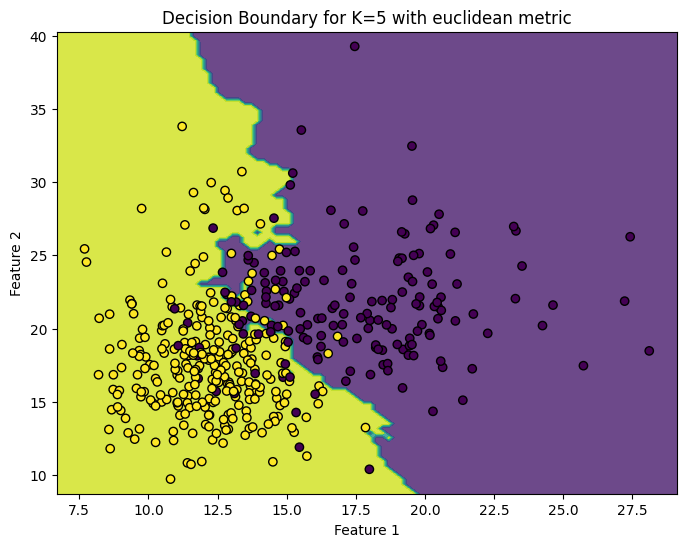

In [22]:
plot_decision_boundary(X_train, y_train, 5, 'euclidean')

We call the `plot_decision_boundary` function and pass the appropriate arguments.

By experimenting with various values of K and different distance metrics, we have gained insight into how the parameters of the KNN model affect its performance. 


In our case, selecting an optimal value of K, around 5, and using the Euclidean distance metric provided the best balance between accuracy and model complexity for this particular dataset. We can use this as a basis to fine-tune our model further through other model improvement techniques. 